In [ ]:
import numpy as np
import torch
import os
import pandas as pd
import torch.nn as nn
import torch.nn.functional as F



---

# **Recording**
[Maman 12 Q3](https://drive.google.com/file/d/1gZKQc0grjmi0sYMxlXiNp_T1_lwrcKfg/view?usp=sharing)

---





---


# **Question 3**


---



---





---

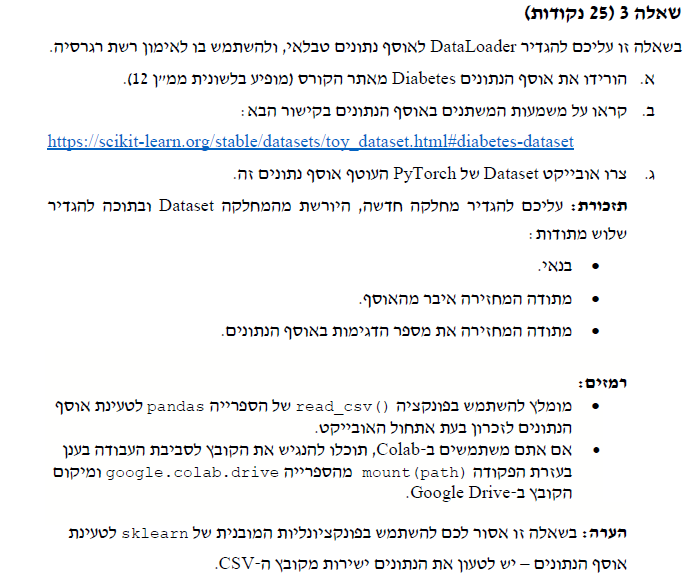

---



In [ ]:
import google.colab.drive as dr

dr.mount('/content/drive')

csv_path = "/content/drive/MyDrive/Colab Notebooks/diabetes.csv"

Mounted at /content/drive


In [ ]:
from torch.utils.data import Dataset
from torchvision import datasets

class CustomDiabetesDataset(Dataset):
    def __init__(self, csv_file_path):
        self.data = pd.read_csv(csv_file_path, sep='\t', dtype=float)
        print(self.data.head())
        self.len = len(self.data)

    def __len__(self):
        return self.len

    def __getitem__(self, idx):
        x_row, y_row = torch.tensor(self.data.iloc[idx].values[:-1]), torch.tensor(self.data.iloc[idx].values[-1:])
        return x_row, y_row

In [ ]:
my_dataset = CustomDiabetesDataset(csv_path)


    AGE  SEX   BMI     BP     S1     S2    S3   S4      S5    S6      Y
0  59.0  2.0  32.1  101.0  157.0   93.2  38.0  4.0  4.8598  87.0  151.0
1  48.0  1.0  21.6   87.0  183.0  103.2  70.0  3.0  3.8918  69.0   75.0
2  72.0  2.0  30.5   93.0  156.0   93.6  41.0  4.0  4.6728  85.0  141.0
3  24.0  1.0  25.3   84.0  198.0  131.4  40.0  5.0  4.8903  89.0  206.0
4  50.0  1.0  23.0  101.0  192.0  125.4  52.0  4.0  4.2905  80.0  135.0


In [ ]:
len(my_dataset)

442

In [ ]:
my_dataset[0]

(tensor([ 59.0000,   2.0000,  32.1000, 101.0000, 157.0000,  93.2000,  38.0000,
           4.0000,   4.8598,  87.0000], dtype=torch.float64),
 tensor([151.], dtype=torch.float64))

In [ ]:
my_dataset[1]

(tensor([ 48.0000,   1.0000,  21.6000,  87.0000, 183.0000, 103.2000,  70.0000,
           3.0000,   3.8918,  69.0000], dtype=torch.float64),
 tensor([75.], dtype=torch.float64))



---
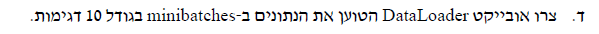


---



In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(my_dataset, batch_size=10, shuffle=True)



---
image.png


---



In [ ]:
train_features, train_labels = next(iter(train_dataloader))

print("TRAIN Batch:", "Features:", train_features, "Labels:", train_labels, sep='\n')

TRAIN Batch:
Features:
tensor([[ 56.0000,   2.0000,  28.7000,  99.0000, 208.0000, 146.4000,  39.0000,
           5.0000,   4.7274,  97.0000],
        [ 48.0000,   1.0000,  29.5000, 131.0000, 207.0000, 132.2000,  47.0000,
           4.0000,   4.9345, 106.0000],
        [ 46.0000,   2.0000,  23.8000,  97.0000, 224.0000, 139.2000,  42.0000,
           5.0000,   5.3660,  81.0000],
        [ 28.0000,   1.0000,  24.2000,  93.0000, 174.0000, 106.4000,  54.0000,
           3.0000,   4.2195,  84.0000],
        [ 55.0000,   2.0000,  23.4000,  83.0000, 166.0000, 101.6000,  46.0000,
           4.0000,   4.5218,  96.0000],
        [ 67.0000,   2.0000,  24.0000,  83.0000, 143.0000,  77.2000,  49.0000,
           3.0000,   4.4308,  94.0000],
        [ 48.0000,   1.0000,  32.7000,  93.0000, 276.0000, 198.6000,  43.0000,
           6.4200,   5.1475,  91.0000],
        [ 54.0000,   2.0000,  27.3000, 100.0000, 200.0000, 144.0000,  33.0000,
           6.0000,   4.7449,  76.0000],
        [ 19.0000,   1.00



---
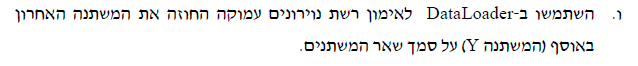


---



In [ ]:

percent_for_train = 0.8
train_len = (int) (percent_for_train * len(my_dataset))
test_len = len(my_dataset) - train_len

train_data, test_data = torch.utils.data.random_split(my_dataset,[train_len, test_len])

train_dataloader = DataLoader(train_data, batch_size=10, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=10, shuffle=True)

train_features, train_labels = next(iter(train_dataloader))
test_features, test_labels = next(iter(test_dataloader))

# print("TEST Batch:", "Features:", test_features, "Labels:", test_labels, sep='\n')

In [ ]:
my_model = nn.Sequential(
    nn.Linear(10, 200),
    nn.ReLU(),
    nn.Linear(200, 200),
    nn.ReLU(),
    nn.Linear(200, 200),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(200, 1)
)

print(my_model)

Sequential(
  (0): Linear(in_features=10, out_features=200, bias=True)
  (1): ReLU()
  (2): Linear(in_features=200, out_features=200, bias=True)
  (3): ReLU()
  (4): Linear(in_features=200, out_features=200, bias=True)
  (5): ReLU()
  (6): Dropout(p=0.5, inplace=False)
  (7): Linear(in_features=200, out_features=1, bias=True)
)


In [ ]:
CE_loss = nn.MSELoss()
my_optimizer = torch.optim.Adam(my_model.parameters(), lr=0.0001)
# my_optimizer = torch.optim.Adam(my_model.parameters(), lr=0.001)

In [ ]:
def iterate_batch(model_in, optimizer_in):
  x, y = next(iter(train_dataloader))
  x = x.float()
  y = y.float()
  
  optimizer_in.zero_grad()
  y_model=model_in(x)
  
  loss=CE_loss(y_model,y)
  loss.backward()
  optimizer_in.step()
  
  return loss.detach()

In [ ]:
from tqdm import tqdm

epochs = 100

batches = len(train_dataloader)
epoch_loss = torch.zeros(epochs)

epochs_prog = tqdm(range(epochs))
for i in epochs_prog:
  for idx in enumerate(train_dataloader):
    epoch_loss[i] += iterate_batch(my_model, my_optimizer)
  epoch_loss[i] /= batches
  epochs_prog.set_description(f"Epoch: {i}/{epochs} Loss:{epoch_loss[i]}")

Epoch: 99/100 Loss:3650.03955078125: 100%|██████████| 100/100 [00:22<00:00,  4.44it/s]


Text(0.5, 0, 'Epoch Number')

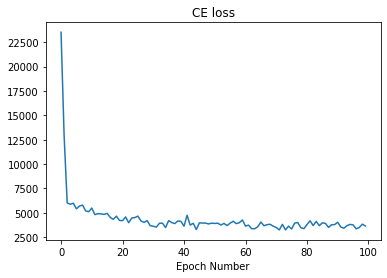

In [ ]:
from matplotlib import pyplot as plt

plt.plot(range(epochs),epoch_loss)
plt.title("CE loss")
plt.xlabel("Epoch Number")



---

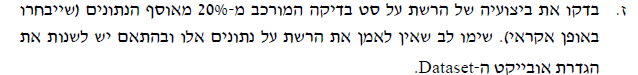

---



In [ ]:
def eval_model_test(model_in):
  loss=0.
  acc=0.
  test_batches=len(test_dataloader)
  i = 0

  threshold = 0.25

  for x, y in test_dataloader:
    with torch.no_grad():
      x = x.float()
      y = y.float()
      y_model=model_in(x) 
      i+=1
      loss += CE_loss(y_model,y)

      low_threshold = y - y*threshold
      high_threshold = y + y*threshold

      cur_acc = torch.logical_and(y_model >= low_threshold, y_model <= high_threshold)
      acc += cur_acc.sum()/len(y)
      print(cur_acc.sum())
      
      print(f"\nTest #{i}:", f"loss = {loss//i}", f"acc = {acc/i}", sep='\n')
  return loss/test_batches, acc/test_batches

In [ ]:
eval_model_test(my_model)

tensor(4)

Test #1:
loss = 3545.0
acc = 0.4000000059604645
tensor(4)

Test #2:
loss = 3695.0
acc = 0.4000000059604645
tensor(6)

Test #3:
loss = 3623.0
acc = 0.46666669845581055
tensor(4)

Test #4:
loss = 3603.0
acc = 0.45000001788139343
tensor(5)

Test #5:
loss = 3452.0
acc = 0.46000003814697266
tensor(4)

Test #6:
loss = 3574.0
acc = 0.4500000476837158
tensor(5)

Test #7:
loss = 3448.0
acc = 0.4571428894996643
tensor(3)

Test #8:
loss = 3417.0
acc = 0.4375000298023224
tensor(5)

Test #9:
loss = 3226.0
acc = 0.45061731338500977


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').


(tensor(3226.7568), tensor(0.4506))